<a href="https://colab.research.google.com/github/vidyaana22/portofolio-dataanalyst/blob/main/Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vidyana Yulianingrum - 162112133002**

# **Instruksi Praktikum**:
1. Buat file ipynb baru.
2. Coba perbaiki training dan validation accuracy (boleh modifikasi preprocessing, arsitektur CNN dst).
3. Berikan markdown untuk tiap step pada file ipynb yang akan disubmit.
4. Tunjukkan preview beberapa gambar dan labelnya yang merupakan hasil dari CNN
4. Submit di hebat dengan batas waktu seminggu beserta dengan laporannya.

link data: https://www.kaggle.com/datasets/juliencalenge/felidae-tiger-lion-cheetah-leopard-puma?select=Felidae

# **Import Library**

In [ ]:
import numpy as np
from ipywidgets import interact, widgets
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import optimizers
from keras import Model
from tensorflow.keras.utils import to_categorical
import zipfile

Melakukan import library yang diperlukan, salah satunya yaitu TensorFlow dan Keras yang digunakan untuk membangun dan melatih model jaringan saraf konvolusional (CNN) untuk klasifikasi gambar. Terdapat keras.models.Sequential yaitu model Keras berbasis urutan (sequential), keras.layers yaitu layer-layer yang dapat ditambahkan ke model, keras.optimizers merupakan optimizer yang dapat digunakan selama pelatihan, serta tensorflow.keras.utils.to_categorical sebuah fungsi untuk mengonversi vektor kelas ke matriks kelas biner.

# **Import Data dan Pre-processing**

In [ ]:
zip_file_path = '/content/Dataset M9.zip'
extracted_folder_path = '/content/Dataset_M9/'

#Ekstraks file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

images = []
species = []

folderin = os.listdir(os.path.join(extracted_folder_path, 'Felidae'))
for folder in folderin:
    dir = os.listdir(os.path.join(extracted_folder_path, 'Felidae', folder))
    for image in dir:
        species.append(image[:-8])
        image_path = os.path.join(extracted_folder_path, 'Felidae', folder, image)
        image = Image.open(image_path).convert('RGB')  #Mengubah warna gambar menjadi RGB
        image = np.asarray(image.resize((200, 200)))   #Mengubah gambar menjadi array dengan ukuran 200x200
        image = image / 255   #Normalisasi data
        images.append(image)

Mengekstrak isi dari file zip yang berisi dataset. Kemudian membuat variabel images yang awalnya berisi list kosong yang akan berisi data gambar yang telah diubah menjadi array dan dinormalisasi. Kemudian membuat variabel species yang juga berisi list kosong yang akan berisi label atau nama spesies yang dikaitkan dengan setiap gambar.

Selanjutnya melakukan iterasi untuk mendapatkan gambar-gambar dari sub-direktori atau folder. Di dalam iterasi ditambahkan label atau nama spesies dari nama file gambar dengan menghapus 8 karakter terakhir menggunakan kode species.append(image[:-8]). Selanjutnya membuka gambar dan mengonversinya ke mode warna RGB jika tidak dalam mode tersebut. Kemudian mengubah gambar menjadi array numpy dan menyesuaikan ukurannya menjadi 200x200 piksel. Dilakukan juga normalisasi nilai piksel menjadi rentang [0, 1]. Terakhir menambahkan gambar yang telah diproses ke dalam list images.

Kode tersebut keseluruhan bertujuan untuk memuat gambar-gambar dari direktori Felidae, memproses setiap gambar dengan mengubah ukurannya dan dinormalisasi, kemudian menyimpannya bersama dengan label spesies terkait ke dalam dua list, yaitu images dan species yang kemudian data yang telah diolah dapat digunakan untuk melatih model klasifikasi gambar.

# **Visualisasi**

In [ ]:
def showimage(imageno):
    plt.figure(figsize = (5,5))
    plt.imshow(images[imageno])

Membuat fungsi bernama showimage yang mengambil satu argumen, yaitu imageno, yang merupakan indeks gambar yang ingin ditampilkan. Di dalam fungsi dibuat suatu objek gambar (figure) dengan ukuran 5x5 inci untuk mengatur ukuran gambar yang akan ditampilkan. Kemudian menampilkan gambar yang ada pada indeks imageno dari list images menggunakan fungsi imshow dari matplotlib.

interactive(children=(IntSlider(value=10, description='imageno', max=219), Output()), _dom_classes=('widget-in…

<function __main__.showimage(imageno)>

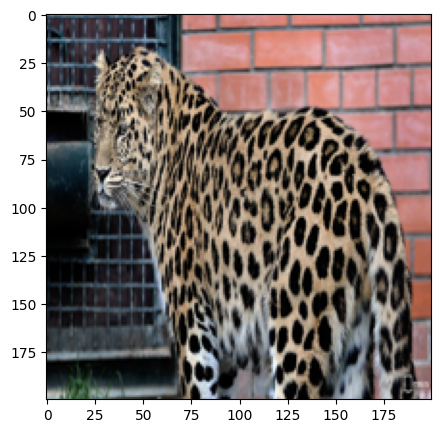

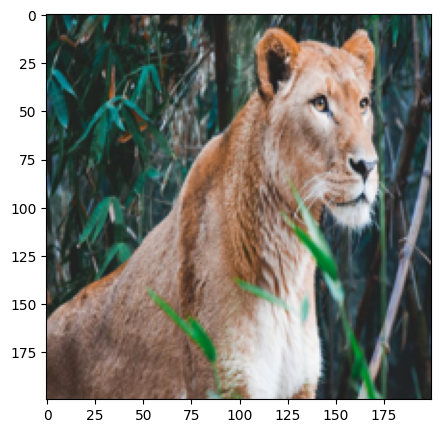

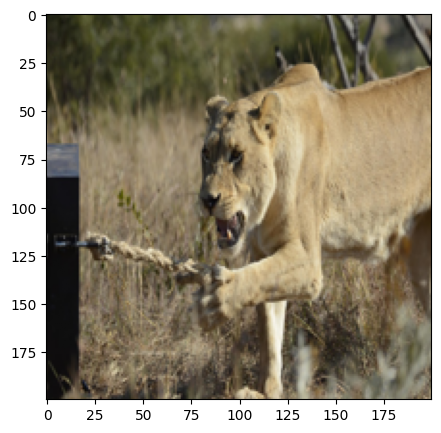

In [ ]:
interact(showimage,
    imageno = widgets.IntSlider(min=0, max=219, step=1, value=10))

Selanjutnya yaitu menampilkan visualisasi atau gambar dari data menggunakan modul interact dan fungsi showimage yang telah dibuat sebelumnya. Modul interact dapat digunakan untuk memudahkan dalam berinteraksi dengan slider dan melihat gambar yang terdapat dalam dataset.

Fungsi dalam modul interact akan membuat widget slider interaktif menggunakan interact() dan menggunakan showimage sebagai fungsi yang akan dijalankan saat slider diubah. Selain itu juga ditetapkan batas nilai dari slider dengan min = 0 dan max = 219 dan nilai awalnya adalah 10.

Selanjutnya dapat dilihat pada output bahwa terdapat slider yang dapat digunakan untuk memilih nomor gambar dari dataset mulai dari 0 hingga 219 dan setiap kali slider berubah, fungsi showimage akan dipanggil dengan nomor gambar yang baru, dan gambar Felidae yang ditampilkan akan berubah.

# **Labelling Gambar**

In [ ]:
uniquelabel = np.unique(species)

label_to_int = {}  #Membuat dictionary kosong untuk kemudian diisi dengan pemetaan label (nama spesies) dengan integer

for i in range(len(uniquelabel)):
    replace = uniquelabel[i]
    label_to_int[replace] = i
print(label_to_int)

#Memetakan labels ke integer menggunakan dictionary label_to_int yang telah dibuat sebelumnya
species_as_int = [label_to_int[label] for label in species]
print(species_as_int)

{'Cheetah': 0, 'Leopard': 1, 'Lion': 2, 'Puma': 3, 'Tiger': 4}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Langkah pertama yaitu menggunakan fungsi np.unique untuk mendapatkan label-label unik dari list species. Kemudian membuat dictionary kosong yang disebut label_to_int untuk menyimpan pemetaan antara label (nama spesies) dengan integer. Setiap label unik akan diwakili oleh satu integer yang mana integer ini akan digunakan sebagai representasi kelas dalam model klasifikasi.

Proses ini akan menghasilkan dictionary di mana setiap label unik dipetakan ke integer yang unik pula. Menggunakan list comprehension untuk mengonversi setiap label dalam list species menjadi representasi integer sesuai dengan pemetaan yang ada dalam dictionary label_to_int. Hasilnya adalah list species_as_int yang berisi representasi integer dari setiap label.

Kemudian menampilkan dictionary label_to_int yang berisi pemetaan antara label dan integer dan menampilkan list species_as_int yang berisi representasi integer dari setiap label pada list species. Terakhir representasi integer dari label-label spesies telah dihasilkan yang kemudian dapat digunakan dalam pelatihan model klasifikasi. Representasi ini akan diperlukan saat melatih model.

Dapat dilihat pada output bahwa semua gambar telah berhasil di berikan label unik sesuai dengan kelasnya. Terdapat 5 kelas pada data gambar, yaitu Cheetah dengan kode 0, Leopard dengan kode 1, Lion dengan kode 2, Puma dengan kode 3, dan terakhir Tiger dengan kode 4.

In [ ]:
one_hot_species = to_categorical(species_as_int, 5)
print(one_hot_species)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


Selanjutnya mengonversi array integer (representasi kelas) menjadi representasi one-hot encoding menggunakan fungsi to_categorical. Parameter pertama (species_as_int) adalah array yang berisi representasi integer dari label (representasi kelas) dan parameter kedua yaitu angka 5 merupakan jumlah kelas atau kategori yang mungkin yang mana mewakili jumlah kelas yang tersedia.Terakhir menampilkan hasil representasi one-hot encoding dari array integer species_as_int.

Setiap baris dalam hasilnya adalah representasi one-hot encoding dari satu data. Misalnya, jika terdapat 3 kelas, maka setiap baris akan menjadi array dengan panjang 3, dan elemen ke-i akan menjadi 1 jika data tersebut termasuk ke dalam kelas ke-i dan 0 jika tidak.

# **Split Data**

In [ ]:
images = np.array(images) #Mengubah images menjadi array NumPy
labels = np.array(one_hot_species) #Mengubah labels menjadi array NumPy
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.25, random_state=32) #Split data menjadi dta training dan testing

#Melihat shape dari data yang telah di split
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(182, 200, 200, 3)
(61, 200, 200, 3)
(182, 5)
(61, 5)


Langkah pertama dalam split data yaitu mengubah list gambar (images) dan label dalam bentuk one-hot encoding (one_hot_species) menjadi array NumPy menggunakan fungsi np.array. Kemudian dataset dibagi menjadi subset pelatihan dan pengujian menggunakan train_test_split dari scikit-learn. Data dibagi dengan proporsi jumlah data testing (test_size) sebesar 0.25 yang mengindikasikan bahwa 25% dari data akan digunakan sebagai dataset pengujian, sedangkan 75% sebagai dataset pelatihan. Kemudian menampilkan bentuk (shape) dari subset pelatihan dan pengujian, serta bentuk label yang sesuai.

Dapat dilihat pada output dimana X_train dan Y_test berisi 182 data sedangkan X_test dan Y_test berisi 61 data gambar.

# **Model CNN dengan Keras Sequential API**

In [ ]:
#Membuat model Sequential
model = Sequential()

#Menambahkan convolutional layer
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (200,200,3)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Menyamakan output dari konvolusi
model.add(Flatten())

#Menambahkan hidden layer
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3))

#Menambahkan output layer
model.add(Dense(5, activation = 'softmax'))

#Mengkompilasi sequential model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')


Langkah pertama yaitu membentuk model jaringan saraf konvolusional (CNN) menggunakan Keras Sequential API kemudian membuat objek model dari kelas Sequential. Model ini akan berisi urutan lapisan (layers) yang tersusun secara sekuensial. Selanjutnya menambahkan lapisan konvolusional dengan 50 filter, masing-masing berukuran 3x3. Fungsi aktivasi yang digunakan adalah ReLU (Rectified Linear Unit).
strides = (1,1) yang menunjukkan langkah kenaikan filter pada setiap iterasi dan padding ='same' yang digunakan untuk memastikan output memiliki ukuran yang sama dengan input, serta input_shape = (200,200,3) menunjukkan dimensi input gambar.

Kemudian menambahkan lapisan konvolusional kedua dengan 75 filter dan fungsi aktivasi ReLU. Menambahkan lapisan pengelompokan maksimum (max pooling) dengan filter ukuran 2x2. Kemudian juga menambahkan lapisan dropout dengan tingkat dropout sebesar 0.25 untuk mengurangi overfitting. Lalu menambahkan lapisan konvolusional ketiga dengan 125 filter dan fungsi aktivasi ReLU. Kemudian menambahkan lapisan pengelompokan maksimum kedua dengan filter ukuran 2x2. Terakhir menambahkan lapisan dropout dengan tingkat dropout sebesar 0.25. Selanjutnya meluruskan seluruh lapisan untuk persiapan input ke lapisan terhubung penuh (fully connected).

Kemudian lapisan terhubung penuh pertama dengan 500 neuron dan fungsi aktivasi ReLU dengan tambahan lapisan dropout dengan tingkat dropout sebesar 0.4. Lalu menambahkan lapisan terhubung penuh kedua dengan 250 neuron dan fungsi aktivasi ReLU dan lapisan dropout dengan tingkat dropout sebesar 0.3.Kemudian manambahkan lapisan output dengan 5 neuron (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax untuk klasifikasi multikelas.

Terakhir mengompilasi model dengan menggunakan fungsi kerugian (loss) categorical crossentropy, metrik akurasi, dan optimizer Adam.

In [ ]:
sequentfit = model.fit(X_train, Y_train, batch_size=20, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
10/10 [==============================] - 132s 12s/step - loss: 7.4186 - accuracy: 0.2143 - val_loss: 1.6116 - val_accuracy: 0.1967
Epoch 2/20
10/10 [==============================] - 130s 13s/step - loss: 1.6073 - accuracy: 0.1703 - val_loss: 1.6117 - val_accuracy: 0.1967
Epoch 3/20
10/10 [==============================] - 123s 12s/step - loss: 1.6004 - accuracy: 0.2418 - val_loss: 1.6103 - val_accuracy: 0.1967
Epoch 4/20
10/10 [==============================] - 131s 13s/step - loss: 1.6038 - accuracy: 0.2418 - val_loss: 1.6109 - val_accuracy: 0.1967
Epoch 5/20
10/10 [==============================] - 119s 12s/step - loss: 1.6076 - accuracy: 0.2692 - val_loss: 1.6118 - val_accuracy: 0.1967
Epoch 6/20
10/10 [==============================] - 136s 14s/step - loss: 1.5958 - accuracy: 0.2418 - val_loss: 1.6191 - val_accuracy: 0.1967
Epoch 7/20
10/10 [==============================] - 121s 12s/step - loss: 1.5844 - accuracy: 0.2857 - val_loss: 1.6170 - val_accuracy: 0.2131
Epoch 

Langkah selanjutnya yaitu melatih model menggunakan data pelatihan (X_train dan Y_train) dengan menggunakan fungsi fit pada Keras. Pelatihan model menggunakan X_train dan Y_train serta dbatch_size = 20 yang menunjukkan jumlah sampel yang digunakan dalam setiap iterasi pelatihan. Gradient akan dihitung berdasarkan batch ini sebelum bobot model diperbarui. Kemudian terdapat epochs = 20 yaitu jumlah epoch atau iterasi total melalui seluruh dataset pelatihan, dan validation_data = (X_test, Y_test) yang menunjukkan data pengujian untuk validasi model setiap akhir epoch.

Setiap epoch akan melibatkan langkah-langkah berikut:
1. Iterasi melalui seluruh dataset pelatihan dalam  batch-batch yang ditentukan oleh batch_size.
2. Menghitung gradient dari fungsi kerugian terhadap parameter model.
3. Memperbarui bobot model menggunakan optimizer (Adam dalam hal ini).
4. Validasi model menggunakan dataset pengujian (X_test dan Y_test).
5. Mengulang langkah-langkah di atas untuk jumlah epoch yang ditentukan.

Proses tersebut akan memperbarui bobot model sehingga dapat meminimalkan fungsi kerugian terhadap data pelatihan, dan sekaligus memastikan bahwa model umumnya dapat men-generalisasi dengan baik pada data baru (validasi). Hasil pelatihan, termasuk akurasi dan fungsi kerugian pada setiap epoch, akan ditampilkan di konsol output. Setelah pelatihan selesai, model yang telah dilatih dapat digunakan untuk membuat prediksi pada data baru.

**Kesimpulan berdasarkan fitting model:**

Berdasarkan iterasi epoch, diperoleh nilai loss pada data pelatihan semakin turun dan tergolong kecil dengan nilai akhir sebesar 0.1162 yang menunjukkan bahwa model memiliki performa yang baik pada data pelatihan. Sedangkan nilai akurasi juga semakin naik dan mencapai 97.25% sehingga performa model sangat baik pada data pelatihan. Jika nilai loss semakin menurun dan nilai akurasi semakin meningkat, maka model berhasil belajar dari data pelatihan dan hal ini yang terjadi pada model CNN dengan Sequential, sehingga dapat dikatakan model berhasil belajar dari data pelatihan.

Kemudian pada data validation diperoleh nilai loss naik turun dan cukup besar dengan terakhir mencapai 4.1147 sedangkan akurasi juga naik turun, maka hal ini dapat menunjukkan bahwa model belum dapat menggeneralisasi data yang tidak digunakan selama pelatihan dengan baik karena nilai akurasi nya pun sangat rendah hanya sekitar 10-30%.

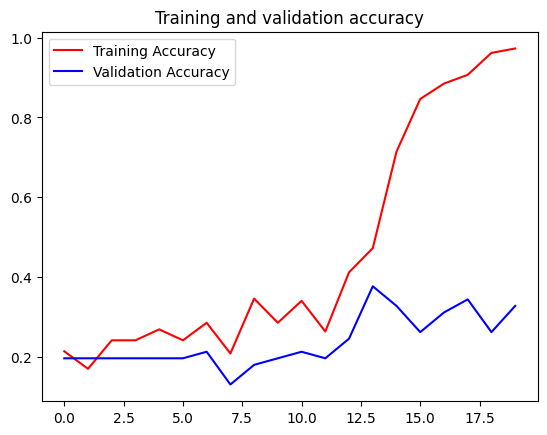

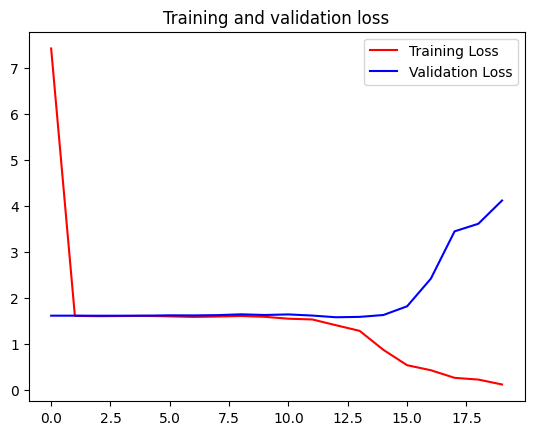

In [ ]:
acc = sequentfit.history['accuracy']
val_acc = sequentfit.history['val_accuracy']
loss = sequentfit.history['loss']
val_loss = sequentfit.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()

Dapat dilihat pada visualisasi dari Akurasi Pelatihan dan Validasi diketahui beberapa hal sebagai berikut.
1. Garis merah menunjukkan akurasi pada data pelatihan, dan garis biru menunjukkan akurasi pada data validasi.
2. Pada awalnya model mungkin memiliki kinerja yang lebih baik pada data pelatihan dibandingkan dengan data validasi. Hal ini ditunjukkan dengan garis merah berada di atas garis biru.
3. Fluktuasi dan pertemuan antara garis biru dan merah menunjukkan adanya overfitting atau underfitting pada model.

Kemudian pada visualisasi Loss Pelatihan dan Validasi diperoleh hasil sebagai berikut.
1. Garis merah menunjukkan loss pada data pelatihan, dan garis biru menunjukkan loss pada data validasi.
2. Model diawal mungkin memiliki loss yang lebih tinggi pada data pelatihan dibandingkan dengan data validasi yang ditunjukkan dengan garis merah di atas garis biru.
3. Terjadi penurunan loss pada data pelatihan yang menunjukkan bahwa model sedang belajar dan meningkatkan kinerjanya.
4. Kurva loss yang lurus ke kanan tanpa kenaikan atau penurunan menunjukkan bahwa model sudah mendekati konvergensi.

# **Model CNN dengan VGG**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (200, 200, 3),  #Menentukan dimensi input gambar
include_top = False,   #Menghilangkan fully connected layer terakhir (output layer) dari model
weights = 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


Model kedua menggunakan arsitektur model VGG16 yang telah dilatih sebelumnya (pre-trained) dari Keras dengan memanfaatkan modul VGG16 dari tensorflow.keras.applications.

Langkah pertama mengimpor arsitektur model VGG16 dari Keras. Kemudian membuat base model menggunakan VGG16 dengan parameter input_shape = (200, 200, 3) untuk menentukan dimensi input gambar sebagai 200x200 piksel dengan 3 channel warna (RGB), include_top = False untuk menghilangkan fully connected layer terakhir (output layer) dari model, sehingga model ini dapat diakses untuk transfer learning, dan weights='imagenet' untuk menggunakan bobot yang telah dilatih sebelumnya pada dataset ImageNet.

Sehingga akan menghasilkan model VGG16 yang siap digunakan sebagai base model untuk transfer learning atau fine-tuning pada tugas klasifikasi gambar yang spesifik.

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

Selanjutnya mengatur semua layer dalam base model (VGG16) menjadi non-trainable agar bobot dari layer-layer tersebut tidak akan di-update selama proses pelatihan pada tahap berikutnya.

Langkahnya yaitu dilakukan iterasi melalui setiap layer dalam base model dan menggunakan layer.trainable = False untuk mengatur atribut trainable dari setiap layer menjadi False yang mengindikasikan bahwa bobot layer tersebut tidak akan di-update selama proses pelatihan model. Tujuan dari langkah ini adalah untuk menjaga bobot dari layer-layer VGG16 agar tetap sesuai dengan pembelajaran pada dataset ImageNet. Hal ini dilakukan ketika menggunakan transfer learning yang mana akan mengambil manfaat dari pengetahuan yang telah diperoleh oleh model pada dataset besar (ImageNet) dan menggunakannya untuk tugas klasifikasi yang lebih kecil atau spesifik.

In [ ]:
from tensorflow.keras import layers

x = layers.Flatten()(base_model.output)

#Menambahkan lapisan terhubung penuh dengan 512 unit tersembunyi dan fungsi aktivasi ReLU
x = layers.Dense(512, activation='relu')(x)

#Menambahkan lapisan dropout dengan tingkat dropout sebesar 0.5
x = layers.Dropout(0.5)(x)

#Menambahkan lapisan output dengan 5 node
x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

Langkah selanjutnya yaitu menambahkan lapisan-lapisan tambahan di atas base model VGG16 untuk membentuk model akhir yang akan digunakan.

Pertama menggunakan layer flatten untuk meratakan output dari base model menjadi satu dimensi. Selanjutnya menambahkan lapisan terhubung penuh dengan 512 unit tersembunyi dan fungsi aktivasi ReLU. Kemudian menambahkan lapisan dropout dengan tingkat dropout sebesar 0.5, yang membantu mengurangi overfitting dengan secara acak "menonaktifkan" beberapa unit selama pelatihan. Lalu menambahkan lapisan output dengan 5 node (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax untuk tugas klasifikasi multi-kelas. Kemudian membentuk model akhir dengan menggunakan input dari base model dan output dari lapisan-lapisan yang baru ditambahkan. Terakhir mengompilasi model dengan menggunakan optimizer RMSprop, fungsi kerugian binary crossentropy (sesuai dengan penggunaan softmax pada lapisan output), dan metrik akurasi.

Sehingga berhasil membangun model dengan menggunakan base model VGG16 yang telah dilatih sebelumnya dan menambahkan beberapa lapisan khusus untuk menyesuaikannya dengan tugas spesifik.

In [ ]:
vggfit = model.fit(X_train, Y_train, batch_size = 20, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10
10/10 [==============================] - 140s 14s/step - loss: 2.3954 - acc: 0.2637 - val_loss: 1.8077 - val_acc: 0.1967
Epoch 2/10
10/10 [==============================] - 134s 14s/step - loss: 0.7956 - acc: 0.5440 - val_loss: 0.9731 - val_acc: 0.2131
Epoch 3/10
10/10 [==============================] - 127s 13s/step - loss: 0.4249 - acc: 0.6484 - val_loss: 0.7845 - val_acc: 0.3443
Epoch 4/10
10/10 [==============================] - 138s 14s/step - loss: 0.3051 - acc: 0.7473 - val_loss: 0.6104 - val_acc: 0.3607
Epoch 5/10
10/10 [==============================] - 141s 14s/step - loss: 0.1794 - acc: 0.8462 - val_loss: 0.5299 - val_acc: 0.4590
Epoch 6/10
10/10 [==============================] - 144s 15s/step - loss: 0.2152 - acc: 0.8736 - val_loss: 0.7727 - val_acc: 0.4590
Epoch 7/10
10/10 [==============================] - 137s 14s/step - loss: 0.2611 - acc: 0.8077 - val_loss: 0.6149 - val_acc: 0.5246
Epoch 8/10
10/10 [==============================] - 133s 14s/step - loss: 0.

Langkah selanjutnya fitting model dengan parameter X_train, Y_train, batch_size = 20 yaitu jumlah sampel yang digunakan dalam setiap iterasi pelatihan, Gradient akan dihitung berdasarkan batch ini sebelum bobot model diperbarui, epochs=10 yaitu jumlah epoch atau iterasi total melalui seluruh dataset pelatihan, validation_data = (X_test, Y_test)yaitu data pengujian yang digunakan untuk validasi model setiap akhir epoch.

Model akan melalui dataset pelatihan selama 10 epoch, dengan setiap epoch melibatkan langkah-langkah berikut:
1. Iterasi melalui seluruh dataset pelatihan dalam batch-batch yang ditentukan oleh batch_size.
2. Menghitung gradient dari fungsi kerugian terhadap parameter model.
3. Memperbarui bobot model menggunakan optimizer RMSprop.
4. Validasi model menggunakan dataset pengujian (X_test dan Y_test).
5. Mengulang langkah-langkah di atas untuk jumlah epoch yang ditentukan.

Proses pelatihan di atas bertujuan untuk mengoptimalkan bobot model sehingga dapat meminimalkan fungsi kerugian terhadap data pelatihan, sambil memastikan bahwa model dapat menggeneralisasi dengan baik pada data baru (validasi). Akurasi dan kerugian pada setiap epoch akan ditampilkan di konsol output. Setelah pelatihan selesai, model yang telah dilatih dapat digunakan untuk membuat prediksi pada data baru.

**Kesimpulan berdasarkan fitting model:**

Berdasarkan iterasi epoch, diperoleh nilai loss pada data pelatihan naik turun namun tergolong kecil dengan nilai akhir sebesar 0.2062 yang menunjukkan bahwa model memiliki performa yang baik pada data pelatihan. Sedangkan nilai akurasi juga naik turun dan hanya mencapai 83.52% sehingga performa model cukup baik pada data pelatihan. Jika nilai loss semakin menurun dan nilai akurasi semakin meningkat, maka model berhasil belajar dari data pelatihan, namun model ini memiliki nilai loss dan akurasi yang naik turun, sehingga belum dapat dikatakan berhasil sepenuhnya dalam belajar dari data pelatihan.

Kemudian pada data validation diperoleh nilai loss naik turun dan cukup rendah dengan terakhir mencapai 0.4498 sedangkan akurasi juga naik turun, maka hal ini dapat menunjukkan bahwa model belum dapat menggeneralisasi data yang tidak digunakan selama pelatihan dengan baik karena nilai akurasi nya pun hanya sekitar 30-50%.

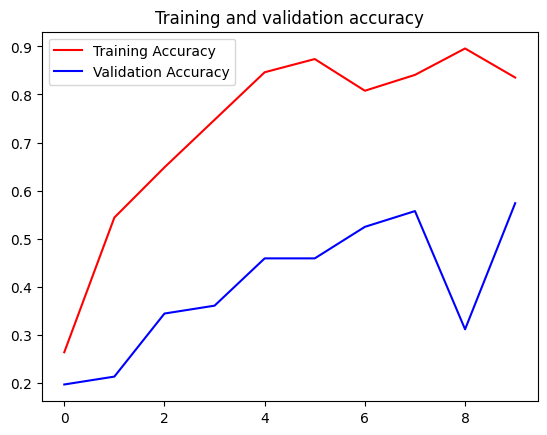

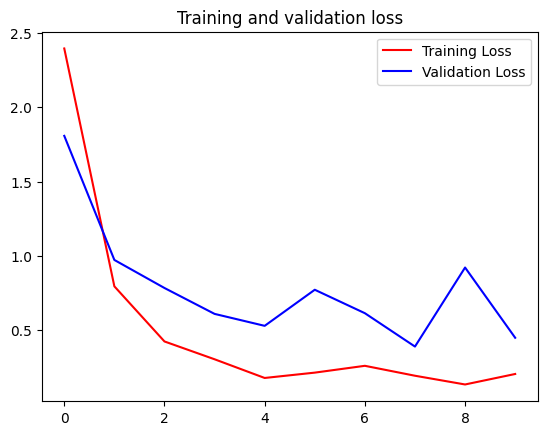

In [ ]:
acc = vggfit.history['acc']
val_acc = vggfit.history['val_acc']
loss = vggfit.history['loss']
val_loss = vggfit.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()

Berdasarkan visualisasi di atas, diperoleh penjelasan mengenai Akurasi Pelatihan dan Validasi sebagai berikut:
1. Garis merah menunjukkan akurasi pada data pelatihan, dan garis biru menunjukkan akurasi pada data validasi.
2. Model memiliki kinerja yang lebih baik pada data pelatihan dibandingkan dengan data validasi. Hal ini ditunjukkan dengan garis merah berada di atas garis biru.
3. Tidak terdapat pertemuan antara garis biru dan merah, sehingga tidak menunjukkan adanya overfitting atau underfitting pada model.

Kemudian dari Loss Pelatihan dan Validasi diperoleh penjelasan sebagai berikut:
1. Garis merah menunjukkan loss pada data pelatihan, dan garis biru menunjukkan loss pada data validasi.
2. Model diawal mungkin memiliki loss yang lebih tinggi pada data pelatihan dibandingkan dengan data validasi yang ditunjukkan dengan garis merah di atas garis biru.
3. Terjadi penurunan loss pada kedua data yang menunjukkan bahwa model sedang belajar dan meningkatkan kinerjanya.
4. Di akhir, data validasi memiliki loss lebih tinggi dibandingkan dengan data pelatihan yang ditunjukkan dengan garis biru di atas garis merah.

# **Model CNN dengan Inception**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (200, 200, 3), include_top = False, weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)

#Menambahkan lapisan-lapisan tambahan di atas model InceptionV3
x = layers.Dense(5, activation = 'softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['acc'])

Model terakhir menggunakan arsitektur model InceptionV3 yang telah dilatih sebelumnya (pre-trained) dari Keras dengan modul InceptionV3 dari tensorflow.keras.applications.

Langkah pertama yang dilakukan yaitu mengimpor arsitektur model InceptionV3 dari Keras dan menginisialisasi modelnya. Dalam inisiasi model menggunakan parameter input_shape untuk menentukan dimensi gambar yang akan digunakan (200x200 piksel dengan 3 channel warna), include_top=False menghilangkan lapisan terhubung penuh di bagian atas model, dan weights='imagenet' menggunakan bobot yang sudah dilatih pada dataset ImageNet.

Kemudian membekukan bobot dari semua layer dalam model InceptionV3 yang sudah dilatih sehingga bobotnya tidak akan diperbarui selama pelatihan. Lalu menambahkan lapisan-lapisan tambahan di atas model InceptionV3. Dalam hal ini termasuk lapisan Flatten, lapisan Dense dengan 1024 unit tersembunyi dan aktivasi ReLU, lapisan Dropout dengan tingkat dropout 0.2, dan lapisan Dense terakhir dengan 5 unit dan aktivasi softmax untuk klasifikasi lima kelas. Lalu membuat model akhir dengan menggunakan input dari model InceptionV3 dan output dari lapisan-lapisan yang baru ditambahkan. Dan terakhir mengompilasi model dengan menggunakan optimizer Adam, fungsi kerugian binary crossentropy (sesuai dengan penggunaan softmax pada lapisan output), dan metrik akurasi.

In [ ]:
inceptionfit = model.fit(X_train, Y_train, batch_size=20, epochs = 5, validation_data = (X_test, Y_test))

Epoch 1/5
10/10 [==============================] - 80s 4s/step - loss: 3.8870 - acc: 0.7363 - val_loss: 2.4155 - val_acc: 0.8689
Epoch 2/5
10/10 [==============================] - 35s 4s/step - loss: 0.8798 - acc: 0.9505 - val_loss: 1.4547 - val_acc: 0.9344
Epoch 3/5
10/10 [==============================] - 35s 4s/step - loss: 0.1566 - acc: 0.9945 - val_loss: 1.9541 - val_acc: 0.9344
Epoch 4/5
10/10 [==============================] - 33s 3s/step - loss: 0.0224 - acc: 1.0000 - val_loss: 2.1331 - val_acc: 0.9344
Epoch 5/5
10/10 [==============================] - 34s 4s/step - loss: 0.0190 - acc: 1.0000 - val_loss: 2.0768 - val_acc: 0.9508


Langkat selanjutnya yaitu fitting model Inception dengan parameter X_train, Y_train, batch_size = 20 yaitu jumlah sampel yang digunakan dalam setiap iterasi pelatihan, gradient akan dihitung berdasarkan batch ini sebelum bobot model diperbarui, epochs = 5 yaitu jumlah epoch atau iterasi total melalui seluruh dataset pelatihan, validation_data=(X_test, Y_test) yaitu data pengujian yang digunakan untuk validasi model setiap akhir epoch,

Model akan melalui dataset pelatihan selama 5 epoch, dengan setiap epoch melibatkan langkah-langkah berikut:
1. Iterasi melalui seluruh dataset pelatihan dalam batch-batch yang ditentukan oleh batch_size.
2. Menghitung gradient dari fungsi kerugian terhadap parameter model.
3. Memperbarui bobot model menggunakan optimizer Adam.
Validasi model menggunakan dataset pengujian (X_test dan Y_test).
4. Mengulang langkah-langkah di atas untuk jumlah epoch yang ditentukan.

Proses pelatihan ini bertujuan untuk mengoptimalkan bobot model sehingga dapat meminimalkan fungsi kerugian terhadap data pelatihan, sambil memastikan bahwa model dapat menggeneralisasi dengan baik pada data baru (validasi). Akurasi dan kerugian pada setiap epoch akan ditampilkan di konsol output. Setelah pelatihan selesai, model yang telah dilatih dapat digunakan untuk membuat prediksi pada data baru.

**Kesimpulan berdasarkan fitting model:**

Berdasarkan iterasi epoch, diperoleh nilai loss pada data pelatihan semakin menurun hingga 0.0190 dan tergolong sangat kecil yang menunjukkan bahwa model memiliki performa yang baik pada data pelatihan. Sedangkan nilai akurasi semakin naik mencapai 100% atau sempurna sehingga performa model sangat baik pada data pelatihan. Jika nilai loss semakin menurun dan nilai akurasi semakin meningkat, maka model berhasil belajar dari data pelatihan dan hal ini yang terjadi pada model CNN dengan Inception, sehingga dapat dikatakan model berhasil belajar dari data pelatihan

Kemudian pada data validation diperoleh nilai loss naik turun dan terakhir mencapai 2.0768 sedangkan akurasi semakin naik, maka hal ini dapat menunjukkan bahwa model dapat menggeneralisasi data yang tidak digunakan selama pelatihan dengan baik.

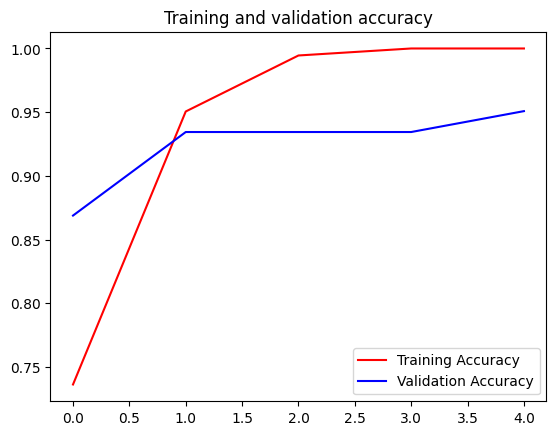

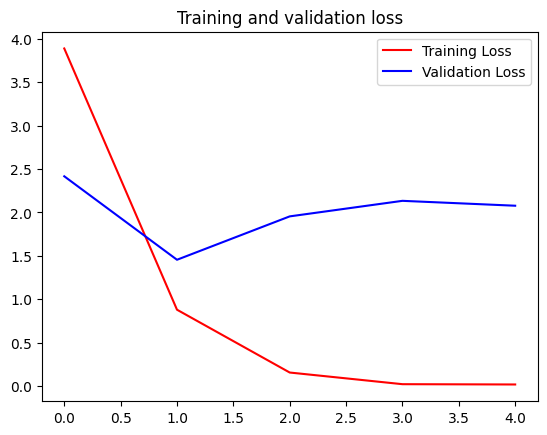

In [ ]:
acc = inceptionfit.history['acc']
val_acc = inceptionfit.history['val_acc']
loss = inceptionfit.history['loss']
val_loss = inceptionfit.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()

Berdasarkan output visualisasi di atas diperoleh penjelasn Akurasi Pelatihan dan Validasi sebagai berikut:
1. Garis biru (akurasi validasi) pada awalnya berada di atas garis merah (akurasi pelatihan), menunjukkan bahwa model mungkin memiliki performa lebih baik pada data validasi awalnya.
2. Terjadi perpotongan di satu titik, yang menandakan bahwa performa pada data pelatihan menjadi lebih baik daripada data validasi setelah titik tersebut.
3. Di akhir, garis merah (akurasi pelatihan) berada di atas garis biru (akurasi validasi), menunjukkan bahwa model mungkin memiliki performa lebih baik pada data pelatihan.

Kemudian pada Loss Pelatihan dan Validasi diperoleh penjelasan sebagai berikut:
1. Garis merah (loss pelatihan) pada awalnya berada di atas garis biru (loss validasi), yang menunjukkan bahwa model overfitting pada data pelatihan.
2. Kemudian terjadi perpotongan di satu titik, yang menandakan bahwa setelah titik tersebut, loss pada data pelatihan menjadi lebih rendah daripada loss pada data validasi. Ini bisa menjadi tanda bahwa model mulai lebih baik menggeneralisasi pada data yang belum pernah dilihat (data validasi) setelah titik tersebut.
3. Kemudian garis biru pada akhirnya berada di atas garis merah, menunjukkan bahwa loss pada data validasi meningkat, sementara loss pada data pelatihan tetap rendah. Ini bisa mengindikasikan overfitting pada data validasi.

**Kesimpulan Model Terbaik**

Berdasarkan training model dengan 3 arsitektur CNN, diperoleh model terbaik yaitu yang dibentuk dengan arsitektur Inception, dimana nilai loss training semakin turun dan akurasi nya semakin naik mencapai 100%. Sedangkan validation loss nya juga semakin turun dengan akurasi yang ikut naik mencapai 95.08%. Dengan demikian dapat disimpulkan bahwa model CNN dengan Inception merupakan model terbaik dalam klasifikasi images Felidae dan dapat digunakan untuk predict model.

# **Predict Model**

2/2 [==============================] - 7s 4s/step


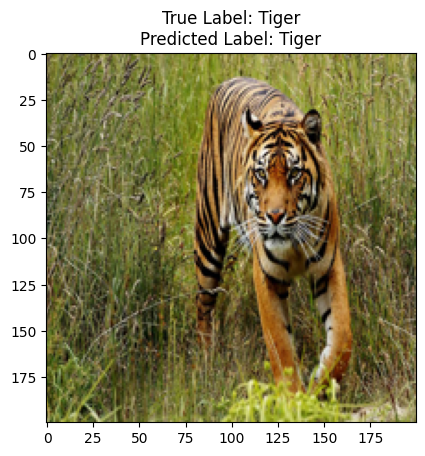

2/2 [==============================] - 5s 2s/step - loss: 2.0768 - acc: 0.9508
Akurasi Prediksi: 95.08%


In [ ]:
#Menentukan species dari Y_test berdasarkan nilai terbesar pada setiap baris
species_from_Y_test = np.argmax(Y_test, axis=1)

#Membuat prediksi untuk seluruh set pengujian
predictions = model.predict(X_test)

#Mengambil indeks kelas prediksi dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menampilkan hasil prediksi untuk beberapa gambar
index_to_display = 45  #Ubah sesuai keinginan mau prediksi index ke berapa (hanya dalam rentang 0-60)
plt.imshow(X_test[index_to_display])
true_label = list(label_to_int.keys())[list(label_to_int.values()).index(species_from_Y_test[index_to_display])]
predicted_label = list(label_to_int.keys())[list(label_to_int.values()).index(predicted_labels[index_to_display])]

plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
plt.show()

# Menghitung akurasi
accuracy = model.evaluate(X_test, Y_test)[1]
print(f"Akurasi Prediksi: {accuracy * 100:.2f}%")


Langkah pertama dalam prediksi model yaitu menggunakan np.argmax untuk menentukan species dari Y_test berdasarkan nilai terbesar pada setiap baris. Hal ini mengasumsikan bahwa Y_test berisi representasi one-hot encoded dari label. Kemudian membuat prediksi menggunakan model terlatih (model) pada data uji (X_test) dengan kode model.predict(X_test). Hasilnya adalah array prediksi yang berisi nilai probabilitas untuk setiap kelas. Kemudian mengambil indeks kelas dengan nilai probabilitas tertinggi dari setiap prediksi dengan kode np.argmax(predictions, axis=1). Fungsi np.argmax mengembalikan indeks nilai maksimum dari array, dan dalam konteks ini axis=1 mengindikasikan bahwa pencarian dilakukan pada sumbu kedua (sumbu kolom) dari array predictions. Hasilnya adalah array predicted_labels yang berisi indeks kelas prediksi untuk setiap sampel dalam X_test.

Selanjutnya menampilkan gambar dari indeks tertentu di X_test, serta label sebenarnya (true_label) dan label yang diprediksi (predicted_label). Kemudian menggunakan model.evaluate untuk menghitung akurasi prediksi pada dataset pengujian (X_test dan Y_test), dan kemudian mencetak hasilnya.

**Kesimpulan Hasil Predict**

Berdasarkan hasil prediksi, dapat dilihat bahwa model mampu melakukan prediksi dengan benar sebesar 95.08%. Hal ini terlihat pada keterangan saat model prediksi index ke 45 dengan true label Tiger dan hasil prediksi juga menunjukkan bahwa hewan dalam gambar masuk ke dalam kelas Tiger.

Selain itu, terdapat nilai loss sebesar 2.0768 yang tergolong cukup kecil. Hal ini menunjukkan bahwa performa model semakin baik dalam memprediksi kelas.